In [1]:
import psi4
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Initial setup

Paste your coordinates for CO$_2$ below. Don't forget to include your molecular charge and multiplicity!

In [2]:
psi4.set_memory('2 GB')
psi4.set_num_threads(2)

co2 = psi4.geometry("""
symmetry c1
0 1
   O       -1.25000        0.00000        0.00000
   C        0.00000        0.00000        0.00000
   O        1.25000        0.00000        0.00000
""")

## Geometry optimization and vibrational frequency analysis

First we will perform a geometry optimization to ensure that our molecule is at its minimum energy structure.

In [3]:
psi4.set_output_file('co2_geomopt_HF-DZ.dat', False)
psi4.set_options({'g_convergence': 'gau_tight'}) # this forces the optimizer to get close to the minimum
psi4.optimize('scf/cc-pVDZ', molecule=co2, dertype='gradient')

Optimizer: Optimization complete!


-187.65250937052735

Let's look at the molecular geometry after optimization and compute the C-O bond length "by hand" (i.e., taking {x,y,z} coordinates for one of the O atoms and the C atom and computing the Euclidean distance between them):

In [4]:
scf_dz_xyz = 0.529177*np.array(co2.geometry()) # the factor of 0.529177 converts from Bohr to Ångstrom
print('The atomic coordinates after optimization are:\n', scf_dz_xyz)

scf_dz_bondlen = np.linalg.norm(scf_dz_xyz[1,:]-scf_dz_xyz[0,:]) # look up NumPy's linalg.norm() function!
print('The C-O bond length after optimization is:\n', scf_dz_bondlen)

The atomic coordinates after optimization are:
 [[-1.14055067e+00  6.48113657e-17  1.62668842e-15]
 [-1.13961561e-11 -1.72775378e-16 -4.33645706e-15]
 [ 1.14055067e+00  6.48113666e-17  1.62668842e-15]]
The C-O bond length after optimization is:
 1.1405506737107873


The command below will execute a vibrational frequency analysis (requiring calculation of the Hessian) for this molecule. We will request that Psi4 approximate the Hessian by calculating finite differences of the gradient. This method is often faster than directly calculating the Hessian, and second derivatives of the energy are often unavailable for various quantum chemistry methods.

In [5]:
psi4.set_output_file('co2_vibfreq_HF-DZ.dat', False)
scf_dz_energy, scf_dz_wfn = psi4.frequency('scf/cc-pVDZ', molecule=co2, return_wfn=True, dertype='gradient')

 9 displacements needed.
 1 2 3 4 5 6 7 8 9


For a linear molecule, we expect there to be 3N-5 normal modes (and therefore normal mode frequencies). In the case of CO$_2$, we expect (3x3) - 5 = 4 normal modes. We will print the computed vibrational frequencies out below:

In [6]:
for i in range(4):
    print(scf_dz_wfn.frequencies().get(0,i))

761.2953702942335
761.2953703599782
1513.3176259835404
2580.2533937232515


It looks like the first two frequencies are identical (as suggested by our resource: http://www.chemtube3d.com/vibrationsCO2.htm). Let's exclude the first one from the list of frequencies that we'll store.

In [7]:
scf_dz_vibfreq = [] # make an empty list to store frequencies

for i in range(3):
    scf_dz_vibfreq.append(scf_dz_wfn.frequencies().get(0,i+1))
    
print(scf_dz_vibfreq)

[761.2953703599782, 1513.3176259835404, 2580.2533937232515]


## Your turn #1: vibrational frequency analysis with larger basis sets

Put the commands above together and calculate the vibrational frequencies of CO$_2$ using the cc-pVTZ and cc-pVQZ basis sets.

In [8]:
# for cc-pVTZ
psi4.set_output_file('co2_geomopt_HF-TZ.dat', False)
psi4.optimize('scf/cc-pVTZ', molecule=co2, dertype='gradient')

scf_tz_xyz = 0.529177*np.array(co2.geometry())
scf_tz_bondlen = np.linalg.norm(scf_tz_xyz[1,:]-scf_tz_xyz[0,:])

psi4.set_output_file('co2_vibfreq_HF-TZ.dat', False)
scf_tz_energy, scf_tz_wfn = psi4.frequency('scf/cc-pVTZ', molecule=co2, return_wfn=True, dertype='gradient')

scf_tz_vibfreq = []
for i in range(3):
    scf_tz_vibfreq.append(scf_tz_wfn.frequencies().get(0,i+1))

Optimizer: Optimization complete!
 9 displacements needed.
 1 2 3 4 5 6 7 8 9


In [9]:
# for cc-pVQZ
psi4.set_output_file('co2_geomopt_HF-QZ.dat', False)
psi4.optimize('scf/cc-pVQZ', molecule=co2, dertype='gradient')

scf_qz_xyz = 0.529177*np.array(co2.geometry())
scf_qz_bondlen = np.linalg.norm(scf_qz_xyz[1,:]-scf_qz_xyz[0,:])

psi4.set_output_file('co2_vibfreq_HF-QZ.dat', False)
scf_qz_energy, scf_qz_wfn = psi4.frequency('scf/cc-pVQZ', molecule=co2, return_wfn=True, dertype='gradient')

scf_qz_vibfreq = []
for i in range(3):
    scf_qz_vibfreq.append(scf_qz_wfn.frequencies().get(0,i+1))

Optimizer: Optimization complete!
 9 displacements needed.
 1 2 3 4 5 6 7 8 9


In the boxes below, plot the C-O bond length and the vibrational frequencies vs. basis set size (as outlined in the instructions):

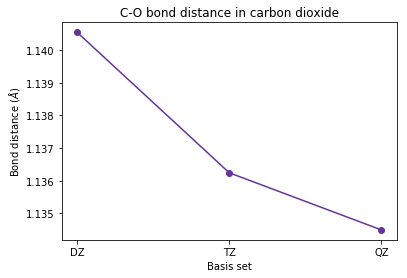

In [22]:
# plot C-O bond length
plt.plot([1, 2, 3], [scf_dz_bondlen, scf_tz_bondlen, scf_qz_bondlen], 
         marker='o', color='RebeccaPurple')
plt.xticks([1, 2, 3], ['DZ', 'TZ', 'QZ'])
plt.xlabel('Basis set')
plt.ylabel(r'Bond distance ($\AA$)')
plt.title('C-O bond distance in carbon dioxide')
plt.show()

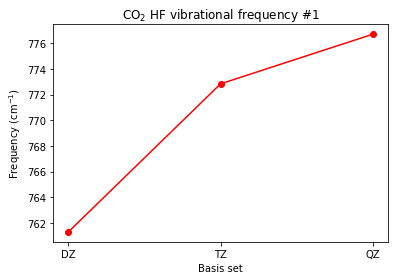

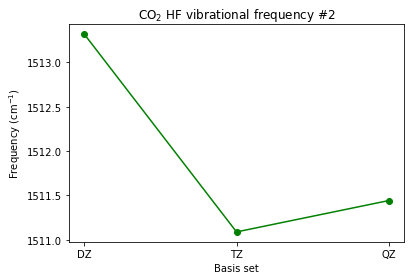

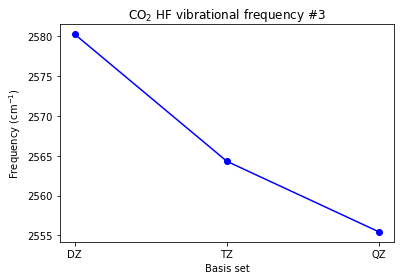

In [23]:
# plot vibrational frequencies
plt.plot([1, 2, 3], [scf_dz_vibfreq[0], scf_tz_vibfreq[0], scf_qz_vibfreq[0]], 
         marker='o', color='red')
plt.xticks([1, 2, 3], ['DZ', 'TZ', 'QZ'])
plt.xlabel('Basis set')
plt.ylabel(r'Frequency (cm$^{-1}$)')
plt.title(r'CO$_2$ HF vibrational frequency #1')
plt.show()

plt.plot([1, 2, 3], [scf_dz_vibfreq[1], scf_tz_vibfreq[1], scf_qz_vibfreq[1]], 
         marker='o', color='green')
plt.xticks([1, 2, 3], ['DZ', 'TZ', 'QZ'])
plt.xlabel('Basis set')
plt.ylabel(r'Frequency (cm$^{-1}$)')
plt.title(r'CO$_2$ HF vibrational frequency #2')
plt.show()

plt.plot([1, 2, 3], [scf_dz_vibfreq[2], scf_tz_vibfreq[2], scf_qz_vibfreq[2]], 
         marker='o', color='blue')
plt.xticks([1, 2, 3], ['DZ', 'TZ', 'QZ'])
plt.xlabel('Basis set')
plt.ylabel(r'Frequency (cm$^{-1}$)')
plt.title(r'CO$_2$ HF vibrational frequency #3')
plt.show()

### Optional: comparing to experimental frequencies

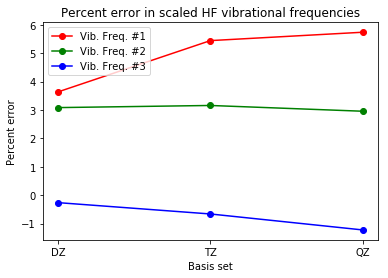

In [25]:
scaled_vibfreq1 = np.array([0.908*scf_dz_vibfreq[0], 0.910*scf_tz_vibfreq[0], 0.908*scf_qz_vibfreq[0]])
scaled_vibfreq2 = np.array([0.908*scf_dz_vibfreq[1], 0.910*scf_tz_vibfreq[1], 0.908*scf_qz_vibfreq[1]])
scaled_vibfreq3 = np.array([0.908*scf_dz_vibfreq[2], 0.910*scf_tz_vibfreq[2], 0.908*scf_qz_vibfreq[2]])

plt.plot([1, 2, 3], 100*(scaled_vibfreq1 - 667)/667, label='Vib. Freq. #1', 
         marker='o', color='red')
plt.plot([1, 2, 3], 100*(scaled_vibfreq2 - 1333)/1333, label='Vib. Freq. #2', 
         marker='o', color='green')
plt.plot([1, 2, 3], 100*(scaled_vibfreq3 - 2349)/2349, label='Vib. Freq. #3', 
         marker='o', color='blue')
plt.xticks([1, 2, 3], ['DZ', 'TZ', 'QZ'])
plt.xlabel('Basis set')
plt.ylabel('Percent error')
plt.title('Percent error in scaled HF vibrational frequencies')
plt.legend()
plt.show()

## Your turn #2 (option 1): Vibrational frequency analysis with DFT (B3LYP)

In [13]:
psi4.set_output_file('co2_geomopt_DFT-DZ.dat', False)
psi4.optimize('B3LYP/cc-pVDZ', molecule=co2, dertype='gradient')
psi4.set_output_file('co2_vibfreq_DFT-DZ.dat', False)
dft_dz_energy, dft_dz_wfn = psi4.frequency('B3LYP/cc-pVDZ', molecule=co2, return_wfn=True, dertype='gradient')

dft_dz_vibfreq = []
for i in range(3):
    dft_dz_vibfreq.append(dft_dz_wfn.frequencies().get(0,i+1))

Optimizer: Optimization complete!
 9 displacements needed.
 1 2 3 4 5 6 7 8 9


In [14]:
psi4.set_output_file('co2_geomopt_DFT-TZ.dat', False)
psi4.optimize('B3LYP/cc-pVTZ', molecule=co2, dertype='gradient')
psi4.set_output_file('co2_vibfreq_DFT-TZ.dat', False)
dft_tz_energy, dft_tz_wfn = psi4.frequency('B3LYP/cc-pVTZ', molecule=co2, return_wfn=True, dertype='gradient')

dft_tz_vibfreq = []
for i in range(3):
    dft_tz_vibfreq.append(dft_tz_wfn.frequencies().get(0,i+1))

Optimizer: Optimization complete!
 9 displacements needed.
 1 2 3 4 5 6 7 8 9


In [15]:
psi4.set_output_file('co2_geomopt_DFT-QZ.dat', False)
psi4.optimize('B3LYP/cc-pVQZ', molecule=co2, dertype='gradient')
psi4.set_output_file('co2_vibfreq_DFT-QZ.dat', False)
dft_qz_energy, dft_qz_wfn = psi4.frequency('B3LYP/cc-pVQZ', molecule=co2, return_wfn=True, dertype='gradient')

dft_qz_vibfreq = []
for i in range(3):
    dft_qz_vibfreq.append(dft_qz_wfn.frequencies().get(0,i+1))

Optimizer: Optimization complete!
 9 displacements needed.
 1 2 3 4 5 6 7 8 9


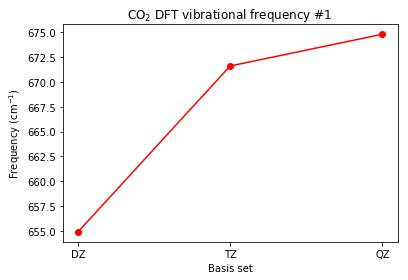

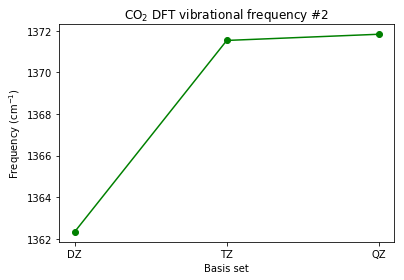

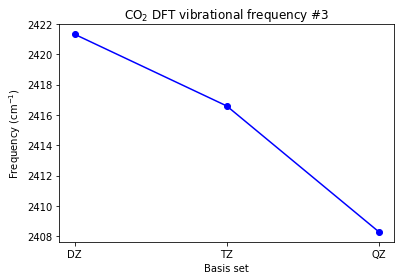

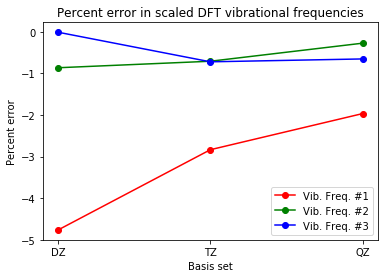

In [26]:
plt.plot([1, 2, 3], [dft_dz_vibfreq[0], dft_tz_vibfreq[0], dft_qz_vibfreq[0]], 
         marker='o', color='red')
plt.xticks([1, 2, 3], ['DZ', 'TZ', 'QZ'])
plt.xlabel('Basis set')
plt.ylabel(r'Frequency (cm$^{-1}$)')
plt.title(r'CO$_2$ DFT vibrational frequency #1')
plt.show()

plt.plot([1, 2, 3], [dft_dz_vibfreq[1], dft_tz_vibfreq[1], dft_qz_vibfreq[1]], 
         marker='o', color='green')
plt.xticks([1, 2, 3], ['DZ', 'TZ', 'QZ'])
plt.xlabel('Basis set')
plt.ylabel(r'Frequency (cm$^{-1}$)')
plt.title(r'CO$_2$ DFT vibrational frequency #2')
plt.show()

plt.plot([1, 2, 3], [dft_dz_vibfreq[2], dft_tz_vibfreq[2], dft_qz_vibfreq[2]], 
         marker='o', color='blue')
plt.xticks([1, 2, 3], ['DZ', 'TZ', 'QZ'])
plt.xlabel('Basis set')
plt.ylabel(r'Frequency (cm$^{-1}$)')
plt.title(r'CO$_2$ DFT vibrational frequency #3')
plt.show()

scaled_vibfreq1 = np.array([0.970*dft_dz_vibfreq[0], 0.965*dft_tz_vibfreq[0], 0.969*dft_qz_vibfreq[0]])
scaled_vibfreq2 = np.array([0.970*dft_dz_vibfreq[1], 0.965*dft_tz_vibfreq[1], 0.969*dft_qz_vibfreq[1]])
scaled_vibfreq3 = np.array([0.970*dft_dz_vibfreq[2], 0.965*dft_tz_vibfreq[2], 0.969*dft_qz_vibfreq[2]])

plt.plot([1, 2, 3], 100*(scaled_vibfreq1 - 667)/667, label='Vib. Freq. #1', 
         marker='o', color='red')
plt.plot([1, 2, 3], 100*(scaled_vibfreq2 - 1333)/1333, label='Vib. Freq. #2', 
         marker='o', color='green')
plt.plot([1, 2, 3], 100*(scaled_vibfreq3 - 2349)/2349, label='Vib. Freq. #3', 
         marker='o', color='blue')
plt.xticks([1, 2, 3], ['DZ', 'TZ', 'QZ'])
plt.xlabel('Basis set')
plt.ylabel('Percent error')
plt.title('Percent error in scaled DFT vibrational frequencies')
plt.legend()
plt.show()

## Your turn #2 (option 2): Vibrational frequency analysis with MP2

In [17]:
psi4.set_output_file('co2_geomopt_MP2-DZ.dat', False)
psi4.optimize('MP2/cc-pVDZ', molecule=co2, dertype='gradient')
psi4.set_output_file('co2_vibfreq_MP2-DZ.dat', False)
mp2_dz_energy, mp2_dz_wfn = psi4.frequency('MP2/cc-pVDZ', molecule=co2, return_wfn=True, dertype='gradient')

mp2_dz_vibfreq = []
for i in range(3):
    mp2_dz_vibfreq.append(mp2_dz_wfn.frequencies().get(0,i+1))

Optimizer: Optimization complete!
 9 displacements needed.
 1 2 3 4 5 6 7 8 9


In [18]:
psi4.set_output_file('co2_geomopt_MP2-TZ.dat', False)
psi4.optimize('MP2/cc-pVTZ', molecule=co2, dertype='gradient')
psi4.set_output_file('co2_vibfreq_MP2-TZ.dat', False)
mp2_tz_energy, mp2_tz_wfn = psi4.frequency('MP2/cc-pVTZ', molecule=co2, return_wfn=True, dertype='gradient')

mp2_tz_vibfreq = []
for i in range(3):
    mp2_tz_vibfreq.append(mp2_tz_wfn.frequencies().get(0,i+1))

Optimizer: Optimization complete!
 9 displacements needed.
 1 2 3 4 5 6 7 8 9


In [19]:
psi4.set_output_file('co2_geomopt_MP2-QZ.dat', False)
psi4.optimize('MP2/cc-pVQZ', molecule=co2, dertype='gradient')
psi4.set_output_file('co2_vibfreq_MP2-QZ.dat', False)
mp2_qz_energy, mp2_qz_wfn = psi4.frequency('MP2/cc-pVQZ', molecule=co2, return_wfn=True, dertype='gradient')

mp2_qz_vibfreq = []
for i in range(3):
    mp2_qz_vibfreq.append(mp2_qz_wfn.frequencies().get(0,i+1))

Optimizer: Optimization complete!
 9 displacements needed.
 1 2 3 4 5 6 7 8 9


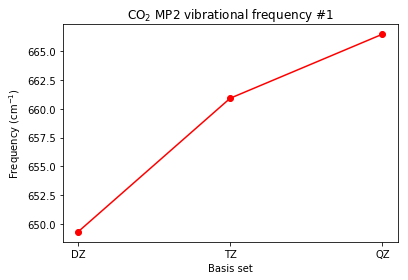

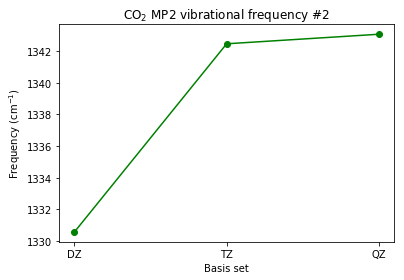

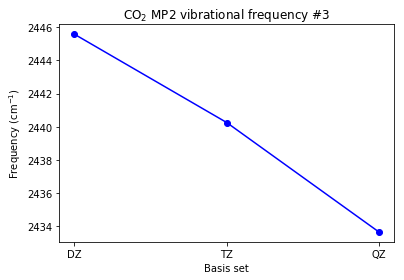

In [27]:
plt.plot([1, 2, 3], [mp2_dz_vibfreq[0], mp2_tz_vibfreq[0], mp2_qz_vibfreq[0]], 
         marker='o', color='red')
plt.xticks([1, 2, 3], ['DZ', 'TZ', 'QZ'])
plt.xlabel('Basis set')
plt.ylabel(r'Frequency (cm$^{-1}$)')
plt.title(r'CO$_2$ MP2 vibrational frequency #1')
plt.show()

plt.plot([1, 2, 3], [mp2_dz_vibfreq[1], mp2_tz_vibfreq[1], mp2_qz_vibfreq[1]], 
         marker='o', color='green')
plt.xticks([1, 2, 3], ['DZ', 'TZ', 'QZ'])
plt.xlabel('Basis set')
plt.ylabel(r'Frequency (cm$^{-1}$)')
plt.title(r'CO$_2$ MP2 vibrational frequency #2')
plt.show()

plt.plot([1, 2, 3], [mp2_dz_vibfreq[2], mp2_tz_vibfreq[2], mp2_qz_vibfreq[2]], 
         marker='o', color='blue')
plt.xticks([1, 2, 3], ['DZ', 'TZ', 'QZ'])
plt.xlabel('Basis set')
plt.ylabel(r'Frequency (cm$^{-1}$)')
plt.title(r'CO$_2$ MP2 vibrational frequency #3')
plt.show()